# HW2 writeup: additional figures 
Figures specifically for the homework write up 

In [15]:
import geopandas as gpd
import pandas as pd
import plotly.figure_factory as ff
import matplotlib.pyplot as plt 
from matplotlib import colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from utils.preprocessing_utils import get_custom_geom
from utils.misc_utils import check_and_create_dir

In [16]:
FIGURES_DIR = "../figures/hw2_writeup/"
check_and_create_dir(FIGURES_DIR)

Created directory: ../figures/hw2_writeup/


## Features map 
Visualize the geometry of the input feature data

In [17]:
FIGNAME = "CONUS_feature_geom_map"

In [18]:
# Get polygon for CONUS region 
conus_poly = get_custom_geom("CONUS")

# Get US states geometry. Remove non-CONUS geometries. 
shp_path = "../data/cb_2018_us_state_5m/"
us_states = gpd.read_file(shp_path).to_crs("4326")[["NAME","geometry"]]
not_CONUS = ["Alaska","Hawaii","Commonwealth of the Northern Mariana Islands", "Guam", "American Samoa", "Puerto Rico","United States Virgin Islands"]
us_states = us_states[~us_states["NAME"].isin(not_CONUS)]
us_states = us_states.rename(columns={"NAME":"GEOM"})

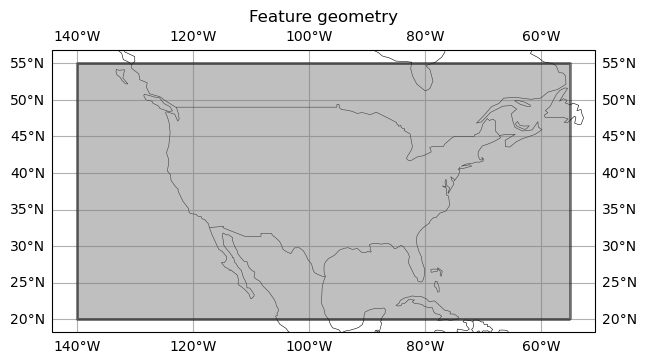

In [19]:
# Projection to use for basemap for map figures 
MAP_CRS = ccrs.AlbersEqualArea(central_longitude=-100, central_latitude=35, standard_parallels=(30, 60))

fig, ax = plt.subplots(figsize=(7,5), subplot_kw={'projection':ccrs.PlateCarree()})
conus_poly.plot(ax=ax, facecolor="grey", edgecolor="black", alpha=0.5, linewidth=2, zorder=20)
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), zorder=10, linewidth=0.4)
ax.add_feature(cfeature.BORDERS.with_scale('110m'), zorder=10, linewidth=0.4)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_title("Feature geometry")

plt.savefig(FIGURES_DIR+FIGNAME+".png", dpi=300)

## Table of model hyperparameters 

In [20]:
FIGNAME = "model_hyperparameters"

In [30]:
settings = {
    "epochs": 500,
    "batch_size": 2048,
    "learning_rate": 0.004,
    "activity_reg": 0.001,
    "conv_filters": 16,
    "dense_neurons": 16,
    "dense_layers": 1,
    "random_seed": 333,
    "dropout_rate": 0.2
} 
settings_df = pd.DataFrame(settings, index=["value"]).T.reset_index(names="parameter")
settings_df["parameter"] = settings_df["parameter"].apply(lambda x: x.replace("_"," "))

In [31]:
fig = ff.create_table(settings_df)
fig.update_layout(
    autosize=False,
    width=200,
    height=200,
)
fig.write_image(FIGURES_DIR+FIGNAME+".png", scale=5)
display(fig)